In [117]:
# Importing libraries we need
import cv2 # OpenCV
import os # Used to interact with OS
import matplotlib.pyplot as plt
import numpy as np # Numpy
import random
import mediapipe as mp 

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

print ("Libraries imported successfully")

Libraries imported successfully


In [118]:
# Check if program can see data path
DATASET_PATH = '../data/raw/ASL_Alphabet_dataset/'
print(f"Data path set to: {DATASET_PATH}")

if not os.path.exists(DATASET_PATH):
    print("Error, path does not seem to exist")

Data path set to: ../data/raw/ASL_Alphabet_dataset/


In [119]:
# Get list of class names
try:
    class_names = sorted([d for d in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, d))])
    if not class_names:
        print("Error, no subdirectories (classes) found in dataset path.")
except FileNotFoundError:
    print("Error, dataset path not found: {DATASET_PATH}")
    class_names = [] # Set to empty to start over

In [120]:
img_bgr = None # Initialize variable to store loaded image
random_class = "N/A" # Initialize variable for the class name

if class_names:
    # Pick a random letter
    random_class = random.choice(class_names)
    class_path = os.path.join(DATASET_PATH, random_class)
    print(f"Attempting to load image from class: {random_class}")

    # Get list of image files in that folder
    try:
        # Check for image extensions
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(('.png','.jpg','.jpeg'))]
        if image_files:
            random_image_name = random.choice(image_files)
            image_path = os.path.join(class_path, random_image_name)
            print(f"Selected image file: {image_path}")

            # Load image using OpenCV
            img_bgr = cv2.imread(image_path)

            if img_bgr is None:
                print(f"Error: OpenCV failed to load image at {image_path}. Check file integrity or path.")
            else:
                print(f"Image loaded successfully! Shape(H, W, Channels): {img_bgr.shape}")
        else:
            print(f"Error: No image files found in folder: {class_path}")
    except FileNotFoundError:
        print(f"Error: Class folder not found: {class_path}")
    except Exception as e:
        print(f"An unexpected error occured while loading images: {e}")
else:
    print(f"Cannot load image. No classes were found in the dataset directory")



Attempting to load image from class: I
Selected image file: ../data/raw/ASL_Alphabet_dataset/I\I1585.jpg
Image loaded successfully! Shape(H, W, Channels): (200, 200, 3)


Displaying image...


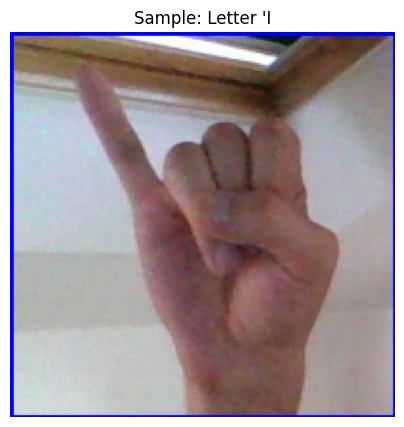

In [121]:
# Display the loaded image, if image was found
if img_bgr is not None:
    print("Displaying image...")
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(5, 5)) # Sample size, can adjust width and height (inches)
    plt.imshow(img_rgb)
    plt.title(f"Sample: Letter '{random_class}") # Show letter name
    plt.axis('off')
    plt.show() # Display the plot
else:
    print("Cannot display image. Not loaded successfully")



In [122]:
# Initialize the MediaPipe Hands solution
# static_image_mode = True: Treats each image independently
# max_num_hands = 1: We only expect one hand for single ASL letters
# min_detection_confidence: How confident the model must be to detect a hand (0.0 to 1.0)

try: 
    hands_detector = mp_hands.Hands(
        static_image_mode=True,      
        max_num_hands=1,             
        min_detection_confidence=0.5) # Adjust confidence if needed (e.g., 0.7 for stricter)

    print(f"MediaPipe Hands initialized successfully") 
    # We will use 'hands_detector' inside the image processing loop later

except Exception as e:
    print(f"Error initializing MediaPipe Hands: {e}")


MediaPipe Hands initialized successfully


In [123]:
results = None # Initialize results variable

if img_bgr is not None:
    print("Processing image with MediaPipe Hands...")
    # 1. Convert the BGR image to RGB (MediaPipe expects RGB)
    image_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # 2. Process image and find hands
    # Use the 'hands_detector' object initialized in Step 3
    results = hands_detector.process(image_rgb) 

    # 3. Check if any hands were detected
    if results.multi_hand_landmarks:
        num_hands_detected = len(results.multi_hand_landmarks)
        print(f"Detected {num_hands_detected} hand(s).")
    else:
        print("No hands detected in the image.")

else:
    print("Skipping MediaPipe processing because image loading failed.")

# The 'results' variable will now hold the detection outcome (or None)


Processing image with MediaPipe Hands...


Detected 1 hand(s).


In [126]:
annotated_image = img_bgr.copy() # Store copy of original image before putting landmarks

# Check if landmarks were found
if results and results.multi_hand_landmarks: 
    # Loop through each detected hand (only 1 supposedly)
    for hand_landmarks in results.multi_hand_landmarks:
        landmark_list = []
        for landmark_id, landmark in enumerate(hand_landmarks.landmark):
            # Append x,y,z coordinates for each landmark
            landmark_list.append([landmark.x, landmark.y, landmark.z])
            print(f"Landmark {landmark_id}: (x={landmark.x:.4f}, y={landmark.y:.4f}, z={landmark.z:.4f})")

        # Convert list of landmarks to NumPy array
        landmark_array = np.array(landmark_list)
        print(f"Extracted landmarks as NumPy array wtih shape: {landmark_array.shape}")
        # print("Drawing landmark in process...")

        # Draw the landmarks and connections on image
        mp_drawing.draw_landmarks(
            image=annotated_image,                  
            landmark_list=hand_landmarks,           # The landmark results for hand
            connections=mp_hands.HAND_CONNECTIONS, # Draw lines, connecting each landmark
            landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style(),
            connection_drawing_spec=mp_drawing_styles.get_default_hand_connections_style())
else:
    print("No landmarks to draw.")

Landmark 0: (x=0.6150, y=0.8561, z=-0.0000)
Landmark 1: (x=0.7469, y=0.7497, z=-0.0951)
Landmark 2: (x=0.7952, y=0.5705, z=-0.1321)
Landmark 3: (x=0.6718, y=0.4759, z=-0.1602)
Landmark 4: (x=0.5423, y=0.4676, z=-0.1690)
Landmark 5: (x=0.6927, y=0.3990, z=-0.0631)
Landmark 6: (x=0.6788, y=0.2558, z=-0.1399)
Landmark 7: (x=0.6886, y=0.3908, z=-0.1765)
Landmark 8: (x=0.6930, y=0.4632, z=-0.1891)
Landmark 9: (x=0.5853, y=0.4028, z=-0.0501)
Landmark 10: (x=0.5617, y=0.2743, z=-0.1244)
Landmark 11: (x=0.5942, y=0.4297, z=-0.1489)
Landmark 12: (x=0.6112, y=0.4675, z=-0.1522)
Landmark 13: (x=0.4864, y=0.4353, z=-0.0527)
Landmark 14: (x=0.4585, y=0.3251, z=-0.1316)
Landmark 15: (x=0.5145, y=0.4683, z=-0.1320)
Landmark 16: (x=0.5470, y=0.5599, z=-0.1128)
Landmark 17: (x=0.3898, y=0.4846, z=-0.0628)
Landmark 18: (x=0.3034, y=0.3277, z=-0.1045)
Landmark 19: (x=0.2584, y=0.2369, z=-0.1135)
Landmark 20: (x=0.2128, y=0.1407, z=-0.1144)
Extracted landmarks as NumPy array wtih shape: (21, 3)


Displaying annotated image...


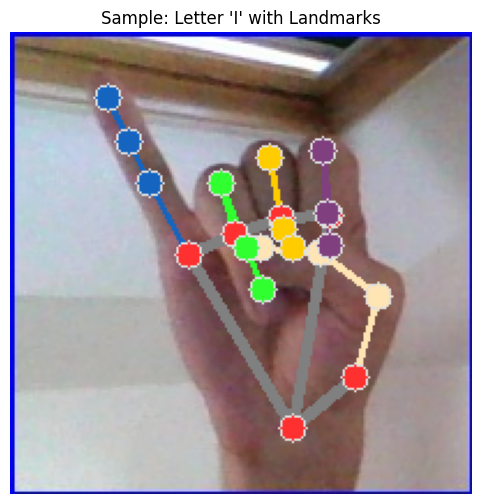

In [125]:
# Display the ANNOTATED image (only if 'img_bgr' was loaded successfully)
if img_bgr is not None:
    print("Displaying annotated image...")
    # Convert the potentially annotated BGR image to RGB for Matplotlib
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(6, 6)) # Maybe make figure slightly larger
    plt.imshow(annotated_image_rgb)
    plt.title(f"Sample: Letter '{random_class}' with Landmarks") 
    plt.axis('off') 
    plt.show() 
else:
    print("Cannot display image - loading failed.")

In [127]:
if landmark_array.shape == (21, 3): # Check if we have the expected landmarks
    # Make landmarks relative to wrist (landmark 0)
    relative_landmarks = landmark_array - landmark_array[0] 
    print("Landmarks relative to wrist (landmark 0 is now [0, 0, 0]):")
    # print(relative_landmarks) # Optional: Print the relative coordinates

    # Next step (maybe for next week, or briefly try today): Scaling
    # Example: Find max absolute value and scale to [-1, 1] or [0, 1]
    max_abs_val = np.max(np.abs(relative_landmarks))
    if max_abs_val > 1e-6: # Avoid division by zero
        scaled_landmarks = relative_landmarks / max_abs_val
        print("Relative landmarks scaled approximately to [-1, 1]:")
        # print(scaled_landmarks)
    else:
        scaled_landmarks = relative_landmarks # Already all zeros

    # The final feature vector for ONE image would be scaled_landmarks.flatten()
    # feature_vector = scaled_landmarks.flatten() 
    # print(f"Flattened feature vector shape: {feature_vector.shape}") # Should be (63,)
else:
    print("Cannot normalize, unexpected landmark array shape.")

Landmarks relative to wrist (landmark 0 is now [0, 0, 0]):
Relative landmarks scaled approximately to [-1, 1]:
